In [1]:
import os
import numpy as np
import pandas as pd
from pymatgen.io.vasp import Outcar
from pymatgen.analysis.elasticity import ElasticTensor

BASE_DIR = "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/rare-earth/vasp_internal_elastic/sqs/elastic"

def process_all_outcars(base_dir):
    rows = []

    for sub in sorted(os.listdir(base_dir)):
        folder = os.path.join(base_dir, sub)
        outcar_path = os.path.join(folder, "OUTCAR")

        if not os.path.isdir(folder) or not os.path.exists(outcar_path):
            print(f"⚠️ Skipping {folder}: no OUTCAR found.")
            continue

        try:
            out = Outcar(outcar_path)
            out.read_elastic_tensor()

            # Convert from kBar → GPa
            C_kbar = np.array(out.data["elastic_tensor"])
            C_gpa = C_kbar / 10.0

            # ✅ Convert from 6×6 Voigt form to full 4th-rank tensor
            tensor = ElasticTensor.from_voigt(C_gpa)

            rows.append({
                "system": sub,
                "C11": C_gpa[0, 0],
                "C12": C_gpa[0, 1],
                "C44": C_gpa[3, 3],
                "K_V": tensor.k_voigt,
                "K_R": tensor.k_reuss,
                "K_H": tensor.k_vrh,
                "G_V": tensor.g_voigt,
                "G_R": tensor.g_reuss,
                "G_H": tensor.g_vrh,
            })

            print(f"{sub}: K_H={tensor.k_vrh:.3f} GPa, G_H={tensor.g_vrh:.3f} GPa")

        except Exception as e:
            print(f"⚠️ Skipping {folder}: error reading OUTCAR ({e}).")
            continue

    return pd.DataFrame(rows)

df_sqs = process_all_outcars(BASE_DIR)
df_sqs

nbw9: K_H=290.707 GPa, G_H=141.988 GPa
ta2nbw7: K_H=267.955 GPa, G_H=117.322 GPa
ta3nbw6: K_H=256.104 GPa, G_H=95.210 GPa
ta4nbw5: K_H=242.149 GPa, G_H=71.317 GPa
ta5nbw4: K_H=230.666 GPa, G_H=66.600 GPa
ta6nbw3: K_H=220.550 GPa, G_H=68.363 GPa
ta7nbw2: K_H=210.091 GPa, G_H=69.766 GPa
ta8nbw: K_H=201.270 GPa, G_H=67.955 GPa
tanbw8: K_H=279.338 GPa, G_H=130.416 GPa


,system,C11,C12,C44,K_V,K_R,K_H,G_V,G_R,G_H
0,nbw9,502.45838,186.63676,131.68195,290.710144,290.703262,290.706703,142.616175,141.360540,141.988357
1,ta2nbw7,441.87524,180.18676,109.61602,267.974590,267.934710,267.954650,117.976474,116.667670,117.322072
2,ta3nbw6,402.93453,179.77365,83.36081,256.121496,256.085809,256.103652,96.291149,94.128346,95.209748
3,ta4nbw5,354.74827,185.41112,62.70156,242.169578,242.129239,242.149408,72.187863,70.446155,71.317009
4,ta5nbw4,332.09810,181.63260,62.71950,230.689132,230.642486,230.665809,67.054285,66.145416,66.599851
5,ta6nbw3,316.33170,172.48700,67.51469,220.601703,220.498438,220.550071,68.596890,68.129793,68.363342
6,ta7nbw2,300.36152,166.01198,71.10747,210.106426,210.074743,210.090584,69.847893,69.683898,69.765896
7,ta8nbw,283.49856,158.94615,72.85871,201.276444,201.262734,201.269589,68.174153,67.736224,67.955188
8,tanbw8,476.99562,181.40719,119.45471,279.340518,279.334784,279.337651,131.138653,129.692943,130.415798


In [ ]:
BASE_DIR = "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/rare-earth/vasp_internal_elastic/ordered/elastic"
df_ordered = process_all_outcars(BASE_DIR)
df_ordered

nbta2w7: K_H=268.492 GPa, G_H=118.408 GPa
nbta3w6: K_H=256.242 GPa, G_H=108.962 GPa


In [3]:
BASE_DIR = "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/rare-earth/vasp_internal_elastic/sqs/elastic_pbesol"
df_sqs_pbesol = process_all_outcars(BASE_DIR)
df_sqs_pbesol

nbw9: K_V=310.460, K_R=310.439, K_H=310.450, G_V=151.350, G_R=149.871, G_H=150.611
ta2nbw7: K_V=286.954, K_R=286.913, K_H=286.934, G_V=128.429, G_R=126.970, G_H=127.699
ta3nbw6: K_V=273.989, K_R=273.972, K_H=273.981, G_V=105.788, G_R=103.332, G_H=104.560
ta4nbw5: K_V=258.631, K_R=258.606, K_H=258.618, G_V=79.442, G_R=77.103, G_H=78.273
ta5nbw4: K_V=246.353, K_R=246.289, K_H=246.321, G_V=70.955, G_R=69.593, G_H=70.274
ta6nbw3: K_V=235.559, K_R=235.413, K_H=235.486, G_V=71.804, G_R=71.090, G_H=71.447
ta7nbw2: K_V=224.481, K_R=224.442, K_H=224.461, G_V=73.956, G_R=73.820, G_H=73.888
ta8nbw: K_V=215.347, K_R=215.318, K_H=215.333, G_V=73.872, G_R=73.661, G_H=73.766
tanbw8: K_V=298.227, K_R=298.213, K_H=298.220, G_V=139.924, G_R=138.243, G_H=139.084


,system,C11,C12,C23,C31,C44,K_V,K_R,K_H,G_V,G_R,G_H
0,nbw9,536.25833,198.79073,194.66626,198.34752,138.70666,310.460454,310.438926,310.449690,151.350165,149.871126,150.610645
1,ta2nbw7,477.22053,190.71138,190.11448,191.12128,118.33470,286.954394,286.913250,286.933822,128.428815,126.969564,127.699189
2,ta3nbw6,436.55983,189.20001,190.17958,193.21305,91.56673,273.989479,273.972454,273.980966,105.788285,103.331523,104.559904
3,ta4nbw5,383.11831,195.98142,193.69637,195.79172,69.26938,258.631364,258.605621,258.618493,79.442081,77.103097,78.272589
4,ta5nbw4,356.48436,194.28823,195.05016,186.74708,66.53891,246.352656,246.288789,246.320722,70.954597,69.593458,70.274028
5,ta6nbw3,340.86445,183.98564,186.53595,179.61086,70.05950,235.558960,235.413148,235.486054,71.803786,71.089845,71.446816
6,ta7nbw2,325.33239,175.27820,174.01016,172.29247,72.26582,224.480964,224.441584,224.461274,73.955879,73.819619,73.887749
7,ta8nbw,308.74019,166.24915,167.78430,170.77154,75.91773,215.347089,215.317978,215.332533,73.871705,73.660573,73.766139
8,tanbw8,509.53667,193.68340,193.27999,191.52616,127.24384,298.226677,298.212948,298.219812,139.924306,138.243333,139.083819


In [4]:
BASE_DIR = "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/rare-earth/vasp_internal_elastic/ordered/elastic_pbesol"
df_ordered_pbesol = process_all_outcars(BASE_DIR)
df_ordered_pbesol

nbta2w7: K_V=287.206, K_R=287.191, K_H=287.198, G_V=128.746, G_R=126.942, G_H=127.844
nbta3w6: K_V=274.692, K_R=274.594, K_H=274.643, G_V=121.030, G_R=119.216, G_H=120.123
nbta4w5: K_V=260.859, K_R=260.820, K_H=260.840, G_V=92.326, G_R=88.571, G_H=90.448
nbta5w4: K_V=247.345, K_R=247.314, K_H=247.330, G_V=77.242, G_R=74.279, G_H=75.761
nbta6w3: K_V=235.970, K_R=235.958, K_H=235.964, G_V=76.134, G_R=73.539, G_H=74.836
nbta7w2: K_V=223.760, K_R=223.705, K_H=223.732, G_V=77.279, G_R=76.622, G_H=76.951
nbta8w: K_V=215.590, K_R=215.540, K_H=215.565, G_V=74.447, G_R=74.181, G_H=74.314
nbta9: K_V=207.117, K_R=207.060, K_H=207.089, G_V=67.448, G_R=66.448, G_H=66.948
nbtaw8: K_V=298.054, K_R=298.041, K_H=298.048, G_V=138.747, G_R=137.423, G_H=138.085
nbw9: K_V=310.229, K_R=310.203, K_H=310.216, G_V=146.543, G_R=144.910, G_H=145.727


,system,C11,C12,C23,C31,C44,K_V,K_R,K_H,G_V,G_R,G_H
0,nbta2w7,484.69789,191.26710,187.61396,187.67059,112.09667,287.205540,287.191006,287.198273,128.746472,126.941575,127.844023
1,nbta3w6,463.00200,181.81024,183.32255,180.21482,108.35373,274.692239,274.594205,274.643222,121.030051,119.216407,120.123229
2,nbta4w5,412.03717,188.94820,186.62297,185.92933,80.89803,260.859017,260.820252,260.839635,92.325578,88.571235,90.448407
3,nbta5w4,370.62939,186.30016,185.38588,185.08179,66.16811,247.344999,247.314395,247.329697,77.242345,74.279264,75.760805
4,nbta6w3,353.20719,178.30755,178.29017,176.10438,69.17075,235.969597,235.957746,235.963671,76.133568,73.539111,74.836340
5,nbta7w2,330.07945,173.21075,171.40397,171.37974,77.60800,223.759864,223.705084,223.732474,77.279465,76.621762,76.950613
6,nbta8w,311.94210,175.62607,162.50837,162.49941,79.51151,215.590258,215.539525,215.564892,74.446871,74.180925,74.313898
7,nbta9,283.89340,167.13850,166.04645,172.34113,73.74662,207.117249,207.059755,207.088502,67.447667,66.447708,66.947688
8,nbtaw8,508.35307,190.05283,197.00654,197.00112,131.26304,298.054110,298.041308,298.047709,138.746772,137.422834,138.084803
9,nbw9,530.26681,204.85917,197.17437,197.22466,133.49206,310.228520,310.203467,310.215994,146.543328,144.909725,145.726527


In [2]:
def symmetrize_elastic_tensor(C):
    """
    Symmetrize a 6x6 elastic stiffness tensor:
    - enforce Cij = Cji
    - average symmetry-equivalent components for cubic-like systems
      (can be adapted for lower symmetries if needed).
    """
    # Enforce strict symmetry between Cij and Cji
    C_sym = 0.5 * (C + C.T)

    # # --- Optional averaging for cubic systems ---
    # # Average C12, C13, C23
    # off_diag = np.mean([C_sym[0, 1], C_sym[0, 2], C_sym[1, 2]])
    # C_sym[0, 1] = C_sym[1, 0] = off_diag
    # C_sym[0, 2] = C_sym[2, 0] = off_diag
    # C_sym[1, 2] = C_sym[2, 1] = off_diag

    # # Average C44, C55, C66
    # shear_diag = np.mean([C_sym[3, 3], C_sym[4, 4], C_sym[5, 5]])
    # C_sym[3, 3] = C_sym[4, 4] = C_sym[5, 5] = shear_diag

    return C_sym

# import numpy as np
# C_kbar = np.round(symmetrize_elastic_tensor(np.array(out.data["elastic_tensor"]))).astype(int)
# C_kbar

In [3]:
import re
def compute_tungsten_fraction(system_name):
    """
    Compute tungsten fraction assuming all alloys have 10 atoms total.
    Handles cases where 'w' has no number (assume 1 W).
    """
    match = re.search(r'w(\d+)', system_name)
    if match:
        n_W = int(match.group(1))
    elif 'w' in system_name:
        n_W = 1
    elif system_name == 'nbta9':
        n_W = 0
    else:
        return np.nan
    return n_W / 10.0

# Apply to dataframe
df_sqs['W_fraction'] = df_sqs['system'].apply(compute_tungsten_fraction)
df_ordered['W_fraction'] = df_ordered['system'].apply(compute_tungsten_fraction)
# df_sqs_pbesol['W_fraction'] = df_sqs_pbesol['system'].apply(compute_tungsten_fraction)
# df_ordered_pbesol['W_fraction'] = df_ordered_pbesol['system'].apply(compute_tungsten_fraction)

NameError: name 'df_ordered' is not defined

In [4]:
# sort based on W fraction
df_sqs = df_sqs.sort_values(by='W_fraction')
df_ordered = df_ordered.sort_values(by='W_fraction')
# df_sqs_pbesol = df_sqs_pbesol.sort_values(by='W_fraction')
# df_ordered_pbesol = df_ordered_pbesol.sort_values(by='W_fraction')

NameError: name 'df_ordered' is not defined

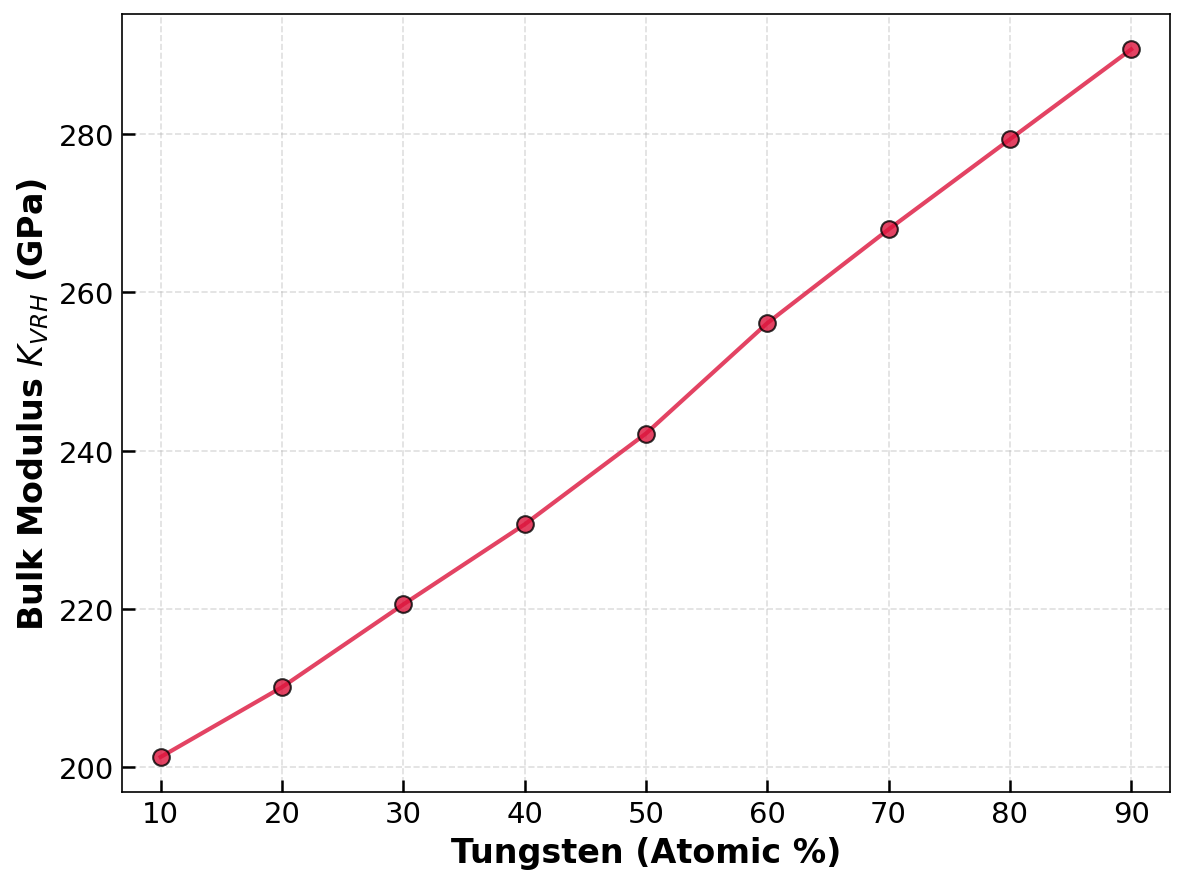

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort by W_fraction to connect points in order
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'] * 100, df_sqs_sorted['K_H'],
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:] * 100, df_ordered_sorted['K_H'][1:],
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
plt.ylabel('Bulk Modulus $K_{VRH}$ (GPa)', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

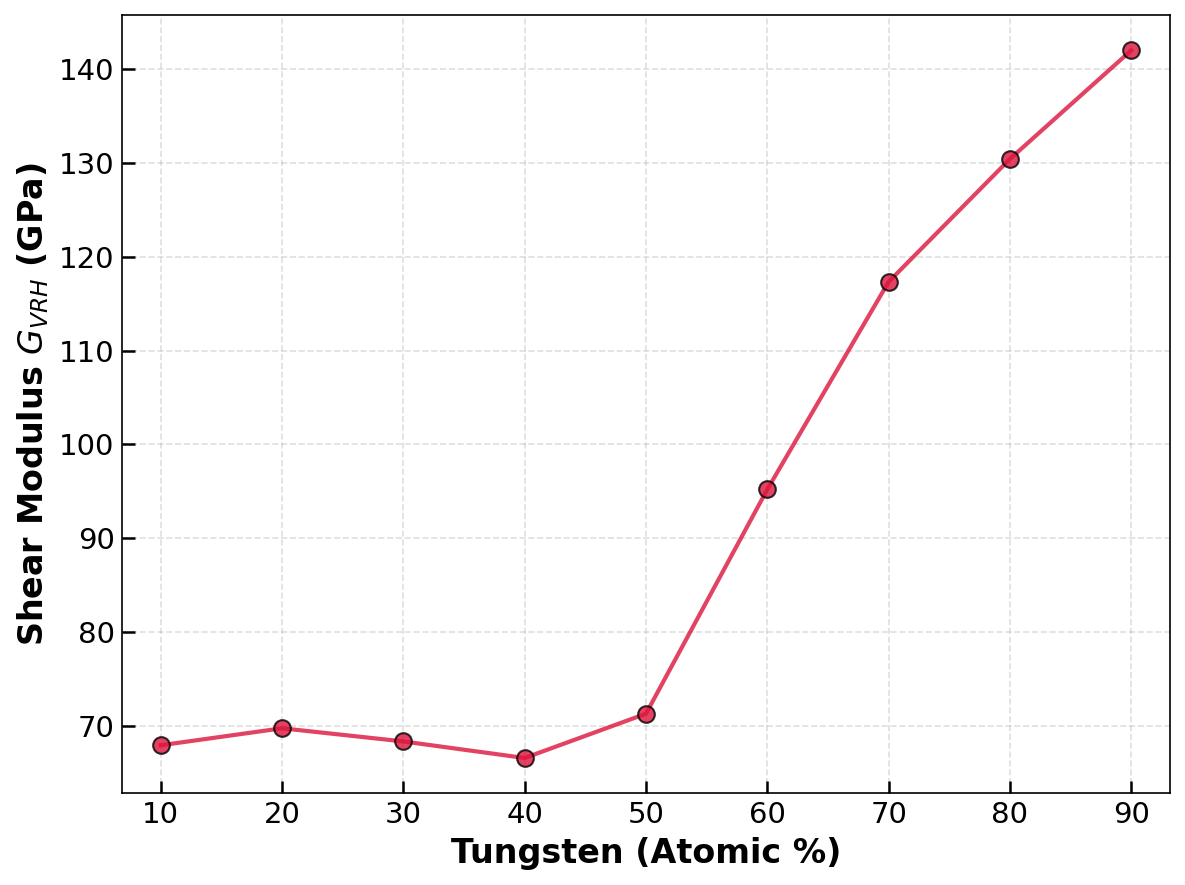

In [20]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort by W_fraction to ensure clean connecting lines
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'] * 100, df_sqs_sorted['G_H'],
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:] * 100, df_ordered_sorted['G_H'][1:],
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
plt.ylabel('Shear Modulus $G_{VRH}$ (GPa)', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

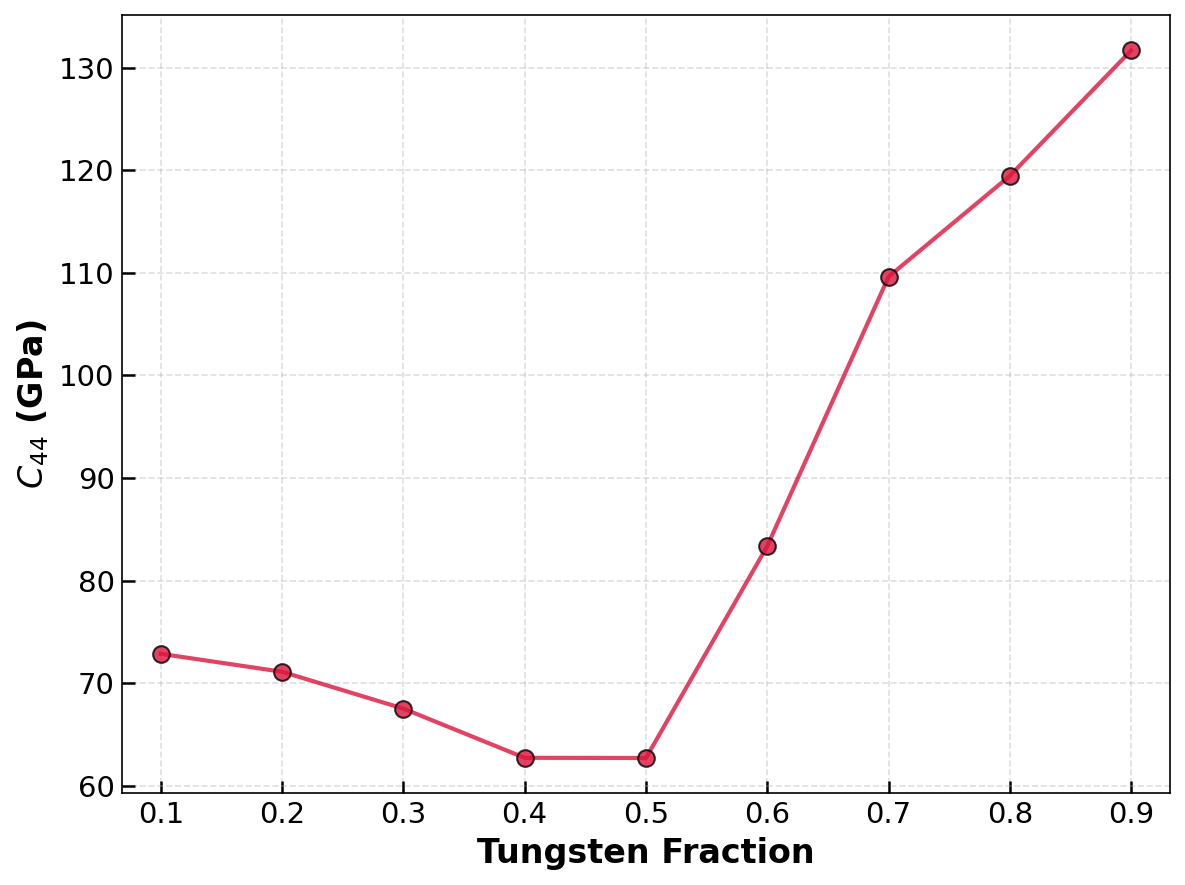

In [9]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort data by W_fraction to connect lines in correct order
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'], df_sqs_sorted['C44'],
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:], df_ordered_sorted['C44'][1:],
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten Fraction', fontsize=16, fontweight='bold')
plt.ylabel('$C_{44}$ (GPa)', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()


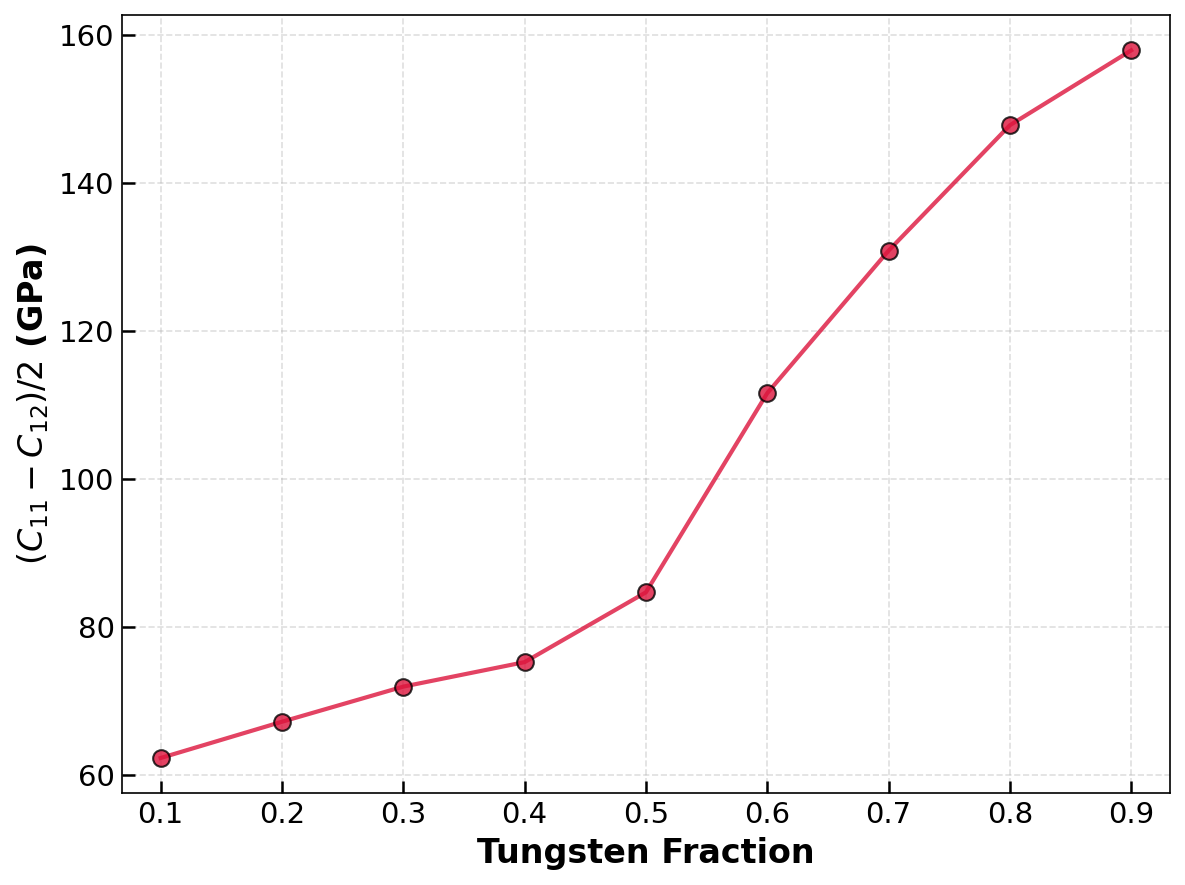

In [10]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort data by W_fraction for proper line connections
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'], (df_sqs_sorted['C11'] - df_sqs_sorted['C12']) / 2,
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:], (df_ordered_sorted['C11'][1:] - df_ordered_sorted['C12'][1:]) / 2,
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten Fraction', fontsize=16, fontweight='bold')
plt.ylabel('$(C_{11} - C_{12})/2$ (GPa)', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()


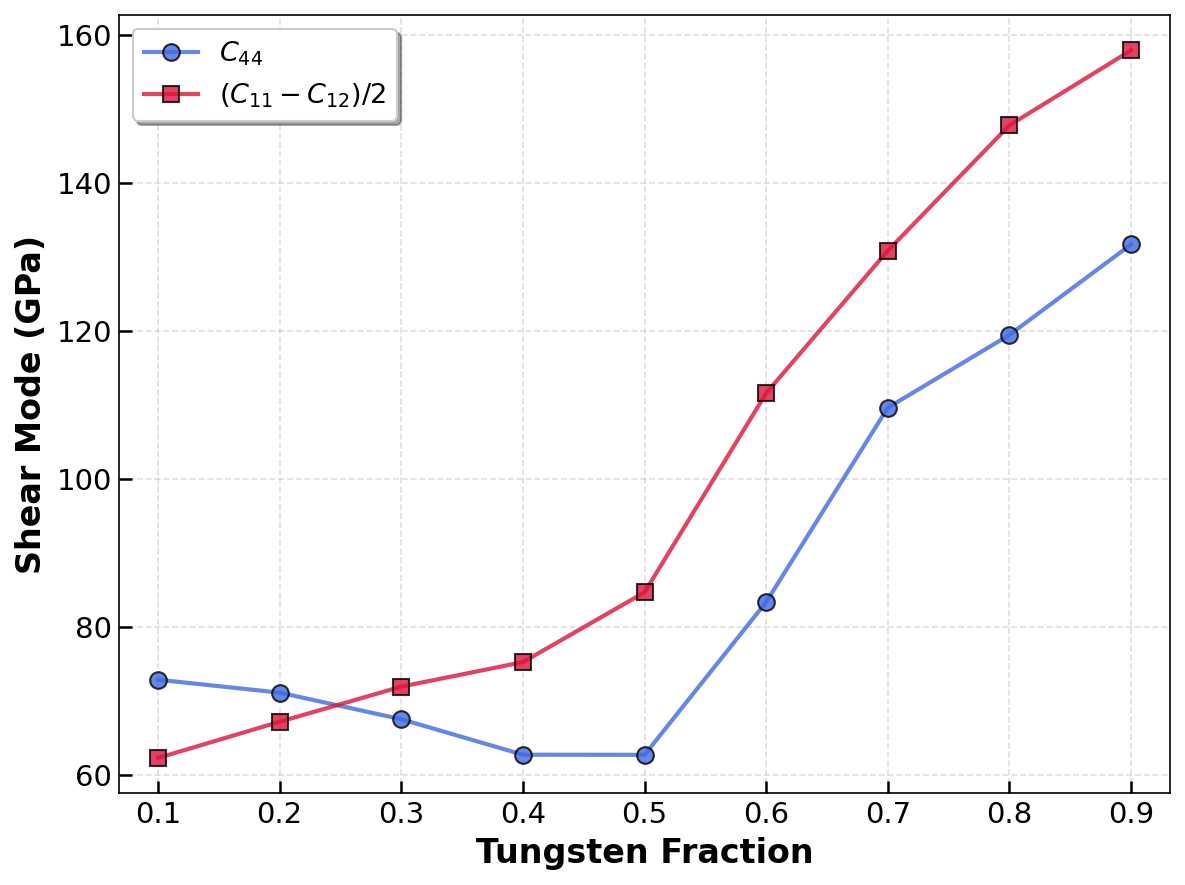

In [17]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort data by W_fraction for proper line connections
df_sqs_sorted = df_sqs.sort_values('W_fraction')

# --- SQS structures - C44 shear mode ---
plt.plot(
    df_sqs_sorted['W_fraction'], df_sqs_sorted['C44'],
    '-o',
    color='royalblue',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='$C_{44}$'
)

# --- SQS structures - (C11-C12)/2 shear mode ---
plt.plot(
    df_sqs_sorted['W_fraction'], (df_sqs_sorted['C11'] - df_sqs_sorted['C12']) / 2,
    '-s',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='$(C_{11} - C_{12})/2$'
)

# --- Labels and title ---
plt.xlabel('Tungsten Fraction', fontsize=16, fontweight='bold')
plt.ylabel('Shear Mode (GPa)', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
plt.legend(fontsize=13, frameon=True, loc='best', fancybox=True, shadow=True)

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

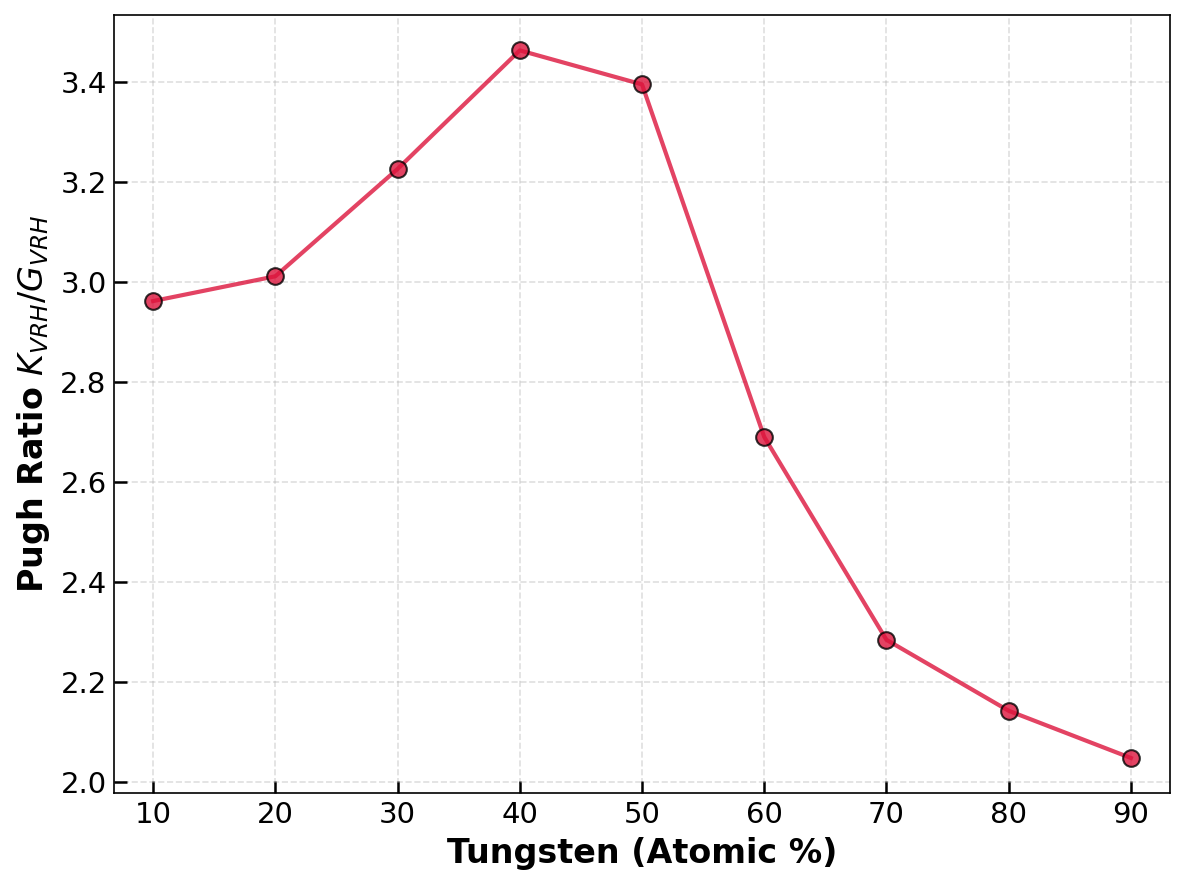

In [21]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort data by W_fraction for proper line connections
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'] * 100, df_sqs_sorted['K_H'] / df_sqs_sorted['G_H'],
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:] * 100, df_ordered_sorted['G_H'][1:] / df_ordered_sorted['K_H'][1:],
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
plt.ylabel('Pugh Ratio $K_{VRH}/G_{VRH}$', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

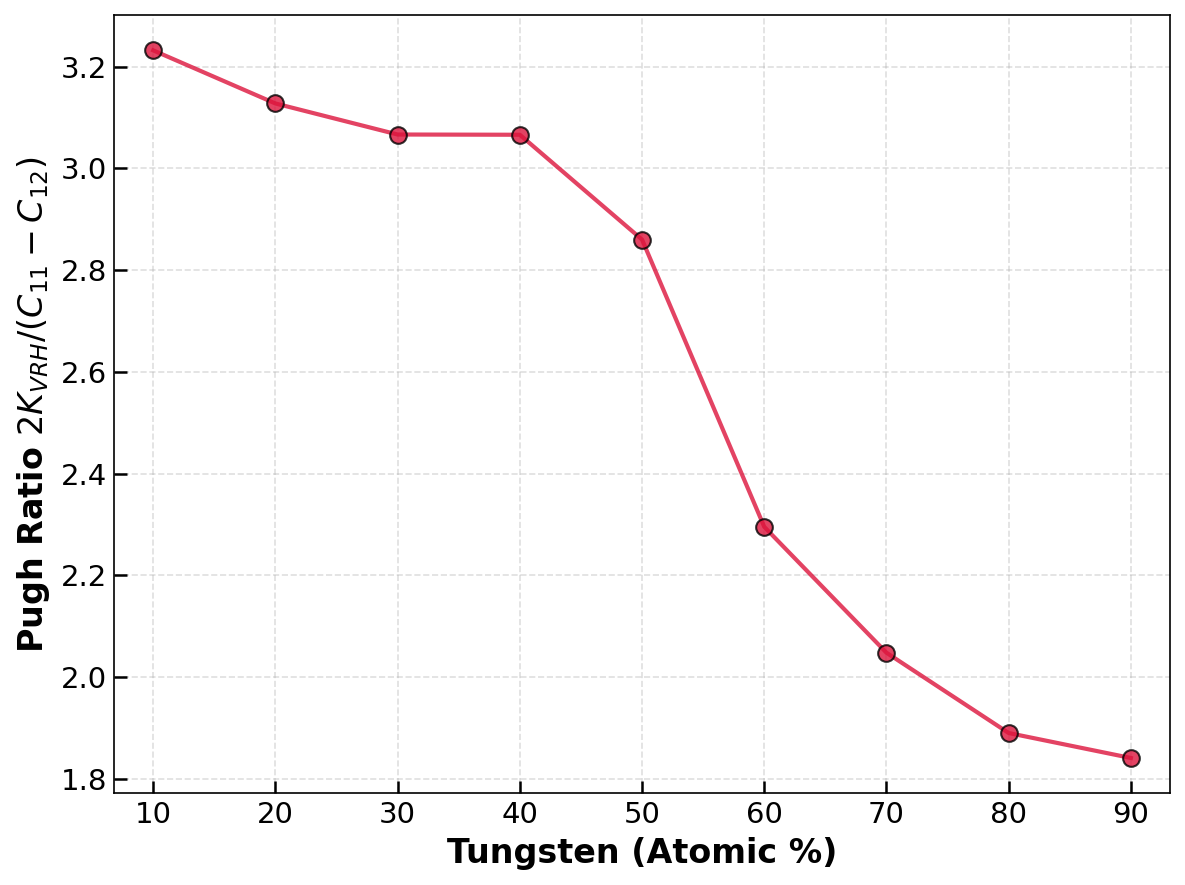

In [23]:
import matplotlib.pyplot as plt

# --- Create figure ---
plt.figure(figsize=(8, 6), dpi=150)

# Sort data by W_fraction for proper line connections
df_sqs_sorted = df_sqs.sort_values('W_fraction')
# df_ordered_sorted = df_ordered.sort_values('W_fraction')

# --- SQS structures ---
plt.plot(
    df_sqs_sorted['W_fraction'] * 100, (2 * df_sqs_sorted['K_H'])/(df_sqs_sorted['C11'] - df_sqs_sorted['C12']),
    '-o',
    color='crimson',
    markersize=8,
    markeredgecolor='black',
    linewidth=2,
    alpha=0.8,
    label='SQS structures'
)

# # --- Ordered structures ---
# plt.plot(
#     df_ordered_sorted['W_fraction'][1:] * 100, (df_ordered_sorted['C11'][1:] - df_ordered_sorted['C12'][1:]) / (2 * df_ordered_sorted['K_H'][1:]),
#     '-^',
#     color='royalblue',
#     markersize=8,
#     markeredgecolor='black',
#     linewidth=2,
#     alpha=0.8,
#     label='Ordered structures'
# )

# --- Labels and title ---
plt.xlabel('Tungsten (Atomic %)', fontsize=16, fontweight='bold')
plt.ylabel('Pugh Ratio $2K_{VRH}/(C_{11} - C_{12})$', fontsize=16, fontweight='bold')

# --- Axes styling ---
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tick_params(direction='in', length=6, width=1.2, colors='black')

# --- Grid styling ---
plt.grid(True, linestyle='--', alpha=0.4, linewidth=0.8)

# --- Legend ---
# plt.legend(fontsize=13, frameon=False, loc='best')

# --- Margins and layout ---
plt.margins(x=0.04)
plt.tight_layout()

plt.show()

In [7]:
(df_sqs['C11'].values - df_sqs['C12'].values)/(2*df_sqs['K_H'].values)

array([0.30941686, 0.31974194, 0.32610441, 0.32615475, 0.34965427,
       0.43568469, 0.48830741, 0.52908806, 0.54319631])

In [5]:
df_sqs['W_fraction']

7    0.1
6    0.2
5    0.3
4    0.4
3    0.5
2    0.6
1    0.7
8    0.8
0    0.9
Name: W_fraction, dtype: float64

In [16]:
(df_sqs['C11'].values - df_sqs['C12'].values)/(2*df_sqs['K_H'].values)

array([0.30941686, 0.31974194, 0.32610441, 0.32615475, 0.34965427,
       0.43568469, 0.48830741, 0.52908806, 0.54319631])

In [39]:
(df_ordered['C11'].values - df_ordered['C12'].values)/(2*df_ordered['K_H'].values)

array([0.26548826, 0.29535822, 0.35076316, 0.37598712, 0.3662548 ,
       0.41086948, 0.50134715, 0.50257442, 0.52340443, 0.53076992])

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# from pymatgen.io.vasp import Outcar

# BASE_DIR = "/home/jovyan/shared-scratch-kabdelma-pvc/kabdelma/rare-earth/vasp_internal_elastic/sqs/elastic"


# def compute_moduli_from_voigt(C):
#     """Compute bulk and shear moduli (Voigt, Reuss, Hill) from a 6x6 stiffness tensor C (in GPa)."""
#     S = np.linalg.inv(C)

#     # Voigt averages
#     K_V = (C[0, 0] + C[1, 1] + C[2, 2] + 2 * (C[0, 1] + C[1, 2] + C[0, 2])) / 9
#     G_V = (
#         (C[0, 0] + C[1, 1] + C[2, 2])
#         - (C[0, 1] + C[1, 2] + C[0, 2])
#         + 3 * (C[3, 3] + C[4, 4] + C[5, 5])
#     ) / 15

#     # Reuss averages
#     K_R = 1 / (
#         S[0, 0] + S[1, 1] + S[2, 2] + 2 * (S[0, 1] + S[1, 2] + S[0, 2])
#     )
#     G_R = 15 / (
#         4 * (S[0, 0] + S[1, 1] + S[2, 2])
#         - 4 * (S[0, 1] + S[1, 2] + S[0, 2])
#         + 3 * (S[3, 3] + S[4, 4] + S[5, 5])
#     )

#     # Hill averages
#     K_H = 0.5 * (K_V + K_R)
#     G_H = 0.5 * (G_V + G_R)

#     return {
#         "C11": C[0, 0],
#         "C12": C[0, 1],
#         "C23": C[1, 2],
#         "C31": C[2, 0],
#         "C44": C[3, 3],
#         "K_V": K_V,
#         "K_R": K_R,
#         "K_H": K_H,
#         "G_V": G_V,
#         "G_R": G_R,
#         "G_H": G_H,
#     }


# def process_all_outcars(base_dir):
#     rows = []
#     for sub in sorted(os.listdir(base_dir)):
#         folder = os.path.join(base_dir, sub)
#         outcar_path = os.path.join(folder, "OUTCAR")

#         if not os.path.isdir(folder):
#             continue
#         if not os.path.exists(outcar_path):
#             print(f"⚠️ Skipping {folder}: no OUTCAR found.")
#             continue
#         try:
#             out = Outcar(outcar_path)
#             out.read_elastic_tensor()
#             C_kbar = np.array(out.data["elastic_tensor"])
#             C_gpa = C_kbar / 10.0  # convert kBar → GPa

#             moduli = compute_moduli_from_voigt(C_gpa)

#             rows.append({"system": sub, **moduli})

#             print(
#                 f"{sub}: "
#                 f"K_V={moduli['K_V']:.3f}, K_R={moduli['K_R']:.3f}, K_H={moduli['K_H']:.3f}, "
#                 f"G_V={moduli['G_V']:.3f}, G_R={moduli['G_R']:.3f}, G_H={moduli['G_H']:.3f}"
#             )
#         except Exception as e:
#             print(f"⚠️ Skipping {folder}: error reading OUTCAR ({e}).")
#             continue

#     return pd.DataFrame(rows)


# df_sqs = process_all_outcars(BASE_DIR)
# df_sqs